In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os, sys
from glob import glob
from scipy.ndimage import gaussian_filter1d
from scipy.ndimage import gaussian_filter
import h5py
import quantities as pq

sys.path.append('../scripts/')
from LPA import LPA_Signal

sys.path.append('../scripts/icsd_scripts/')
from data_processing_before_lpa import *


In [5]:
sim_data_dir = '../data/sim_data/'
fig_dir = 'Figures/test_notebooks'

In [6]:
# for plotting
plt.rcParams.update({'font.size': 16})

## Load simulation data

In [7]:
nchan_sim = 26                                          # Number of channels on probe in simulation

trial_dur_sim = 750                                     # Duration one trial (ms)
tstim_onset_sim = 250
tstim_onset_sim_dg = 500
trial_dur_sim_dg = 3000
ntrials_sim = 10                                        # Number of trials
t_rem_trial_start = 50

trial_dur_sim_corr = trial_dur_sim-t_rem_trial_start
trial_dur_sim_dg_corr = 3000-t_rem_trial_start
tstim_onset_sim = tstim_onset_sim-t_rem_trial_start
tstim_onset_sim_dg = tstim_onset_sim_dg-t_rem_trial_start

channel = np.arange(nchan_sim)

## Load spike data from model to use in decomposition of simulated CSD

### Spikes from LGN

In [21]:
nstim = 2
ntime = 700
fir_rate_lgn_all_stim_trial_avg = np.zeros((nstim, ntime))

### White flash

In [22]:
model_input_path = os.path.join(sim_data_dir, 'input_to_sims_files')
filename = 'lgn_exp_input_NO_ON-OFF_class_10trials_nov_15_short.h5'
loadpath = os.path.join(model_input_path, filename)
file = h5py.File(loadpath, 'r')
neuron_ids_lgn_input = np.array(file['spikes']['gids'])
timestamps_lgn_input = np.array(file['spikes']['timestamps'])
file.close()

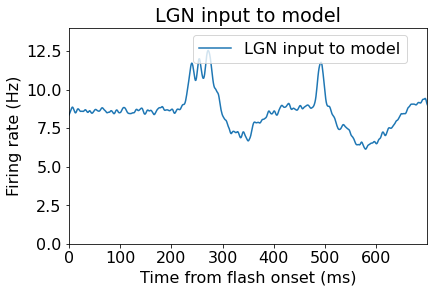

In [23]:
ntrials_sim = 10
bins_lgn = np.linspace(0, ntrials_sim*trial_dur_sim, ntrials_sim*trial_dur_sim+1)
fir_rate_lgn_input_w_flash = np.histogram(timestamps_lgn_input, bins = bins_lgn)[0]/17400
fir_rate_lgn_input_w_flash = fir_rate_lgn_input_w_flash.reshape((ntrials_sim, trial_dur_sim))
fir_rate_lgn_input_w_flash = fir_rate_lgn_input_w_flash[:,t_rem_trial_start:]
#fir_rate_lgn_input_w_flash = (fir_rate_lgn_input_w_flash.T - np.mean(fir_rate_lgn_input_w_flash[:,:tstim_onset_sim], axis=1)).T
#fir_rate_lgn_input_w_flash = fir_rate_lgn_input_w_flash[:,tstim_onset_sim:]
fir_rate_lgn_flash_plot = np.mean(fir_rate_lgn_input_w_flash, axis=0)
istim = 0
fir_rate_lgn_all_stim_trial_avg[istim] = fir_rate_lgn_flash_plot
fir_rate_lgn_flash_plot = gaussian_filter1d(fir_rate_lgn_flash_plot, sigma = 2)


fig = plt.figure(figsize = (6,4))

ax = fig.add_subplot(1,1,1)
ax.plot(fir_rate_lgn_flash_plot*1E3, color = 'tab:blue', label = 'LGN input to model')
ax.margins(x=0)
ax.set_ylim([0, 14])
ax.set_ylabel('Firing rate (Hz)')
ax.set_xlabel('Time from flash onset (ms)')
fig.legend(bbox_to_anchor = (0.96, 0.92))

ax.set_title('LGN input to model')

fig.subplots_adjust(left = 0.12, right = 0.95, bottom = 0.15, top = 0.9)

fig_name = 'lgn-input-to-model.png'

#savepath = os.path.join(fig_dir, fig_name)

#fig.savefig(savepath, facecolor = 'w')

### Black flash

In [24]:
model_input_path = os.path.join(sim_data_dir, 'input_to_sims_files')
filename = 'lgn_black_flash_exp_input_NO_ON-OFF_class_10trials_nov_15_short.h5'
loadpath = os.path.join(model_input_path, filename)
file = h5py.File(loadpath, 'r')
neuron_ids_lgn_input = np.array(file['spikes']['gids'])
timestamps_lgn_input = np.array(file['spikes']['timestamps'])
file.close()

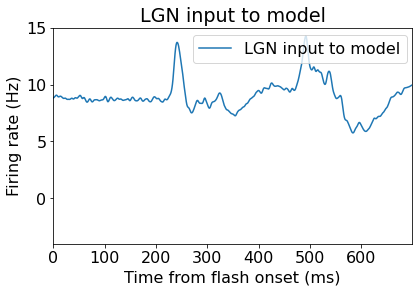

In [25]:
ntrials_sim = 10
bins_lgn = np.linspace(0, ntrials_sim*trial_dur_sim, ntrials_sim*trial_dur_sim+1)
fir_rate_lgn_input_b_flash = np.histogram(timestamps_lgn_input, bins = bins_lgn)[0]/17400
fir_rate_lgn_input_b_flash = fir_rate_lgn_input_b_flash.reshape((ntrials_sim, trial_dur_sim))
fir_rate_lgn_input_b_flash = fir_rate_lgn_input_b_flash[:,t_rem_trial_start:]
#fir_rate_lgn_input_b_flash = (fir_rate_lgn_input_b_flash.T - np.mean(fir_rate_lgn_input_b_flash[:,:tstim_onset_sim], axis=1)).T
#fir_rate_lgn_input_b_flash = fir_rate_lgn_input_b_flash[:,tstim_onset_sim:]
fir_rate_lgn_b_flash_plot = np.mean(fir_rate_lgn_input_b_flash, axis=0)
istim = 1
fir_rate_lgn_all_stim_trial_avg[istim] = fir_rate_lgn_b_flash_plot
fir_rate_lgn_b_flash_plot = gaussian_filter1d(fir_rate_lgn_b_flash_plot, sigma = 2)


fig = plt.figure(figsize = (6,4))

ax = fig.add_subplot(1,1,1)
ax.plot(fir_rate_lgn_b_flash_plot*1E3, color = 'tab:blue', label = 'LGN input to model')
ax.margins(x=0)
ax.set_ylim([-4, 15])
ax.set_ylabel('Firing rate (Hz)')
ax.set_xlabel('Time from flash onset (ms)')
fig.legend(bbox_to_anchor = (0.96, 0.92))

ax.set_title('LGN input to model')

fig.subplots_adjust(left = 0.12, right = 0.95, bottom = 0.15, top = 0.9)

fig_name = 'lgn-input-to-model.png'

#savepath = os.path.join(fig_dir, fig_name)

#fig.savefig(savepath, facecolor = 'w')

### Spikes from feedback

In [26]:
fir_rate_fb_all_stim_trial_avg = np.zeros((nstim, ntime))

#### White flash

In [27]:
model_input_path = os.path.join(sim_data_dir, 'input_to_sims_files')
filename = 'fb_from_LM_short.h5'
loadpath = os.path.join(model_input_path, filename)
file = h5py.File(loadpath, 'r')
neuron_ids_fb_input = np.array(file['spikes']['gids'])
timestamps_fb_input = np.array(file['spikes']['timestamps'])
file.close()

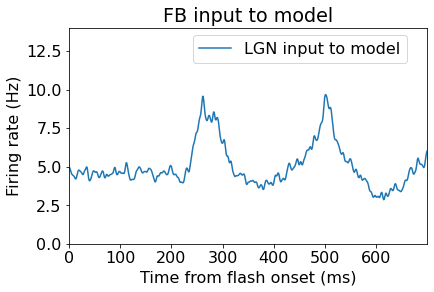

In [28]:
ntrials_sim = 10
bins_fb = np.linspace(0, ntrials_sim*trial_dur_sim, ntrials_sim*trial_dur_sim+1)
fir_rate_fb_input_w_flash = np.histogram(timestamps_fb_input, bins = bins_fb)[0]/1E3
fir_rate_fb_input_w_flash = fir_rate_fb_input_w_flash.reshape((ntrials_sim, trial_dur_sim))
fir_rate_fb_input_w_flash = fir_rate_fb_input_w_flash[:,t_rem_trial_start:]
#fir_rate_lgn_input_w_flash = (fir_rate_lgn_input_w_flash.T - np.mean(fir_rate_lgn_input_w_flash[:,:tstim_onset_sim], axis=1)).T
#fir_rate_lgn_input_w_flash = fir_rate_lgn_input_w_flash[:,tstim_onset_sim:]
fir_rate_fb_flash_plot = np.mean(fir_rate_fb_input_w_flash, axis=0)
istim = 0
fir_rate_fb_all_stim_trial_avg[istim] = fir_rate_fb_flash_plot
fir_rate_fb_flash_plot = gaussian_filter1d(fir_rate_fb_flash_plot, sigma = 2)


fig = plt.figure(figsize = (6,4))

ax = fig.add_subplot(1,1,1)
ax.plot(fir_rate_fb_flash_plot*1E3, color = 'tab:blue', label = 'LGN input to model')
ax.margins(x=0)
ax.set_ylim([0, 14])
ax.set_ylabel('Firing rate (Hz)')
ax.set_xlabel('Time from flash onset (ms)')
fig.legend(bbox_to_anchor = (0.96, 0.92))

ax.set_title('FB input to model')

fig.subplots_adjust(left = 0.12, right = 0.95, bottom = 0.15, top = 0.9)

fig_name = 'FB-input-to-model.png'

#savepath = os.path.join(fig_dir, fig_name)

#fig.savefig(savepath, facecolor = 'w')

#### Black flash

In [29]:
model_input_path = os.path.join(sim_data_dir, 'input_to_sims_files')
filename = 'fb_from_LM_black_short.h5'
loadpath = os.path.join(model_input_path, filename)
file = h5py.File(loadpath, 'r')
neuron_ids_fb_input = np.array(file['spikes']['gids'])
timestamps_fb_input = np.array(file['spikes']['timestamps'])
file.close()

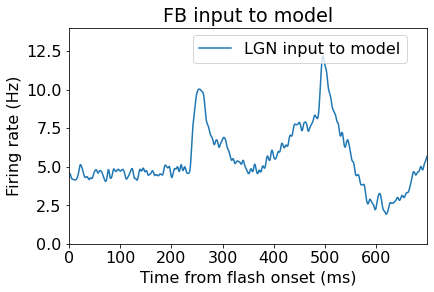

In [30]:
ntrials_sim = 10
bins_fb = np.linspace(0, ntrials_sim*trial_dur_sim, ntrials_sim*trial_dur_sim+1)
fir_rate_fb_input_w_flash = np.histogram(timestamps_fb_input, bins = bins_fb)[0]/1E3
fir_rate_fb_input_w_flash = fir_rate_fb_input_w_flash.reshape((ntrials_sim, trial_dur_sim))
fir_rate_fb_input_w_flash = fir_rate_fb_input_w_flash[:,t_rem_trial_start:]
#fir_rate_lgn_input_w_flash = (fir_rate_lgn_input_w_flash.T - np.mean(fir_rate_lgn_input_w_flash[:,:tstim_onset_sim], axis=1)).T
#fir_rate_lgn_input_w_flash = fir_rate_lgn_input_w_flash[:,tstim_onset_sim:]
fir_rate_fb_flash_plot = np.mean(fir_rate_fb_input_w_flash, axis=0)
istim = 1
fir_rate_fb_all_stim_trial_avg[istim] = fir_rate_fb_flash_plot
fir_rate_fb_flash_plot = gaussian_filter1d(fir_rate_fb_flash_plot, sigma = 2)


fig = plt.figure(figsize = (6,4))

ax = fig.add_subplot(1,1,1)
ax.plot(fir_rate_fb_flash_plot*1E3, color = 'tab:blue', label = 'LGN input to model')
ax.margins(x=0)
ax.set_ylim([0, 14])
ax.set_ylabel('Firing rate (Hz)')
ax.set_xlabel('Time from flash onset (ms)')
fig.legend(bbox_to_anchor = (0.96, 0.92))

ax.set_title('FB input to model')

fig.subplots_adjust(left = 0.12, right = 0.95, bottom = 0.15, top = 0.9)

fig_name = 'FB-input-to-model.png'

#savepath = os.path.join(fig_dir, fig_name)

#fig.savefig(savepath, facecolor = 'w')

### Background input

In [31]:
fir_rate_bkg_all_stim_trial_avg = np.zeros((nstim, ntime))

In [32]:
model_input_path = os.path.join(sim_data_dir, 'input_to_sims_files')
filename = 'bkg_nest.h5'
loadpath = os.path.join(model_input_path, filename)
file = h5py.File(loadpath, 'r')
neuron_ids_bkg_input = np.array(file['spikes']['gids'])
timestamps_bkg_input = np.array(file['spikes']['timestamps'])
file.close()

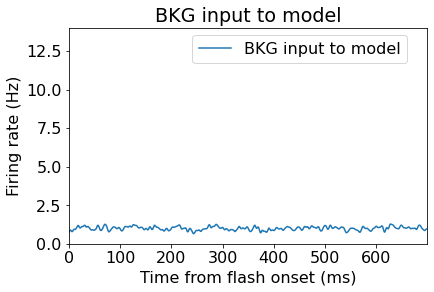

In [33]:
ntrials_sim = 10
bins_bkg = np.linspace(0, ntrials_sim*trial_dur_sim, ntrials_sim*trial_dur_sim+1)
fir_rate_bkg_input_w_flash = np.histogram(timestamps_bkg_input, bins = bins_bkg)[0]/1E3
fir_rate_bkg_input_w_flash = fir_rate_bkg_input_w_flash.reshape((ntrials_sim, trial_dur_sim))
fir_rate_bkg_input_w_flash = fir_rate_bkg_input_w_flash[:,t_rem_trial_start:]
#fir_rate_lgn_input_w_flash = (fir_rate_lgn_input_w_flash.T - np.mean(fir_rate_lgn_input_w_flash[:,:tstim_onset_sim], axis=1)).T
#fir_rate_lgn_input_w_flash = fir_rate_lgn_input_w_flash[:,tstim_onset_sim:]
fir_rate_bkg_flash_plot = np.mean(fir_rate_bkg_input_w_flash, axis=0)
for istim in range(2):
    fir_rate_bkg_all_stim_trial_avg[istim] = fir_rate_bkg_flash_plot

fir_rate_bkg_flash_plot = gaussian_filter1d(fir_rate_bkg_flash_plot, sigma = 2)


fig = plt.figure(figsize = (6,4))

ax = fig.add_subplot(1,1,1)
ax.plot(fir_rate_bkg_flash_plot*1E3, color = 'tab:blue', label = 'BKG input to model')
ax.margins(x=0)
ax.set_ylim([0, 14])
ax.set_ylabel('Firing rate (Hz)')
ax.set_xlabel('Time from flash onset (ms)')
fig.legend(bbox_to_anchor = (0.96, 0.92))

ax.set_title('BKG input to model')

fig.subplots_adjust(left = 0.12, right = 0.95, bottom = 0.15, top = 0.9)

fig_name = 'BKG-input-to-model.png'

#savepath = os.path.join(fig_dir, fig_name)

#fig.savefig(savepath, facecolor = 'w')

### Spikes from V1

In [35]:
selected_sims_data_dir = os.path.join(sim_data_dir, '*full_model*')
timestamps_configs = find_all_fir_rates_files_sim(selected_sims_data_dir.rsplit('/', 1)[0], 'timestamps_with_neuron_ids*.npy')
sim_names = list(timestamps_configs.keys())
print(sim_names)
sim_name = sim_names[-1]

['full_model_white_flash', 'full_model_black_flash']


In [36]:
npop_guess = 4

In [37]:
sims_spike_trains_cell_pops = timestamps_to_spiketrains_sim(timestamps_configs, mode = 'only_exc')


 full_model_white_flash
e23Cux2
e4Nr5a1
e4Rorb
e4Scnn1a
e4other
e5Rbp4
e5noRbp4
e6Ntsr1
i1Htr3a
Use only excitatory cells. Skip.
i23Htr3a
Use only excitatory cells. Skip.
i23Pvalb
Use only excitatory cells. Skip.
i23Sst
Use only excitatory cells. Skip.
i4Htr3a
Use only excitatory cells. Skip.
i4Pvalb
Use only excitatory cells. Skip.
i4Sst
Use only excitatory cells. Skip.
i5Htr3a
Use only excitatory cells. Skip.
i5Pvalb
Use only excitatory cells. Skip.
i5Sst
Use only excitatory cells. Skip.
i6Htr3a
Use only excitatory cells. Skip.
i6Pvalb
Use only excitatory cells. Skip.
i6Sst
Use only excitatory cells. Skip.

 full_model_black_flash
e23Cux2
e4Nr5a1
e4Rorb
e4Scnn1a
e4other
e5Rbp4
e5noRbp4
e6Ntsr1
i1Htr3a
Use only excitatory cells. Skip.
i23Htr3a
Use only excitatory cells. Skip.
i23Pvalb
Use only excitatory cells. Skip.
i23Sst
Use only excitatory cells. Skip.
i4Htr3a
Use only excitatory cells. Skip.
i4Pvalb
Use only excitatory cells. Skip.
i4Sst
Use only excitatory cells. Skip.
i5Htr3a


In [38]:
sims_spike_trains_layer_pops = spiketrains_by_layer(sims_spike_trains_cell_pops, npop_guess = npop_guess)

full_model_white_flash
e23Cux2 12689
e4Nr5a1 1248
e4Rorb 2605
e4Scnn1a 3072
e4other 3329
e5Rbp4 6010
e5noRbp4 1559
e6Ntsr1 12882
full_model_black_flash
e23Cux2 12689
e4Nr5a1 1248
e4Rorb 2605
e4Scnn1a 3072
e4other 3329
e5Rbp4 6010
e5noRbp4 1559
e6Ntsr1 12882


In [39]:
fir_rate_all_trials = dict()
fir_rate_trial_avg = dict()

fir_rate_trial_avg_pops_temp = np.zeros((len(sims_spike_trains_layer_pops.keys()), npop_guess, 700))
for isim, sim_name in enumerate(sims_spike_trains_layer_pops.keys()):
    print(sim_name)
    for ipop, pop_name in enumerate(sims_spike_trains_layer_pops[sim_name].keys()):
        print(pop_name)
        fir_rate_temp = np.mean(np.mean(sims_spike_trains_layer_pops[sim_name]\
                                            [pop_name][:,:,t_rem_trial_start:], axis = 0), axis = 0)
        
        fir_rate_trial_avg_pops_temp[isim, ipop] = fir_rate_temp
        

for ipop, pop_name in enumerate(sims_spike_trains_layer_pops[sim_name].keys()):
    print(pop_name)
    fir_rate_trial_avg[pop_name] = fir_rate_trial_avg_pops_temp[:, ipop].T

full_model_white_flash
L2/3
L4
L5
L6
full_model_black_flash
L2/3
L4
L5
L6
L2/3
L4
L5
L6


### Put the external input firing rates and V1 population firing rates together into one array for LPA application

In [41]:
use_model_fir_rates = True

rmat_model_w_lgn_fb = np.zeros((nstim, ntime, npop_guess+3))

rmat_model_w_lgn_fb[:,:,0] = fir_rate_lgn_all_stim_trial_avg*1E3
rmat_model_w_lgn_fb[:,:,1:-2] = np.array(list(fir_rate_trial_avg.values())).T*1E3
rmat_model_w_lgn_fb[:,:,-2] = fir_rate_fb_all_stim_trial_avg*1E3
rmat_model_w_lgn_fb[:,:,-1] = fir_rate_bkg_all_stim_trial_avg*1E3

In [42]:
population_names = ['LGN', 'L2/3', 'L4', 'L5', 'L6', 'FB', 'BKG']

#### Plot firing rates of each population for check

Text(0, 0.5, 'Firing rate (Hz)')

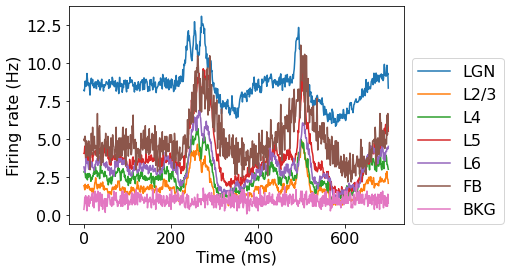

In [43]:
for ipop in range(rmat_model_w_lgn_fb.shape[-1]):
    plt.plot(rmat_model_w_lgn_fb[0,:,ipop], label = population_names[ipop])
    
plt.legend(bbox_to_anchor = (1,0.8))
plt.xlabel('Time (ms)')
plt.ylabel('Firing rate (Hz)')

# Next five cells are only needed if you want to apply LPA using V1 firing rates estimated from MUA instead of model firing rates in decomposition (see supplementary figure S5)

## Load V1 laminar firing rates estimated from LPA on MUA

In [46]:
filename = 'lpa_on_sim_mua_5pops.npy'

In [47]:
loadpath = os.path.join('lpa_results_data', filename)

data_lpa_on_mua = np.load(loadpath, allow_pickle=True)[()]

In [48]:
fir_rate_lpa_est = data_lpa_on_mua['rmat'][:,:,1:]

In [49]:
fir_rate_lpa_est.shape

(2, 700, 4)

In [ ]:
use_model_fir_rates = False

rmat_lpa_w_lgn_fb = np.zeros((nstim, ntime, npop_guess+3))

rmat_lpa_w_lgn_fb[:,:,0] = fir_rate_lgn_all_stim_trial_avg*1E3
rmat_lpa_w_lgn_fb[:,:,1:-2] = fir_rate_lpa_est*1E3
rmat_lpa_w_lgn_fb[:,:,-2] = fir_rate_fb_all_stim_trial_avg*1E3
rmat_lpa_w_lgn_fb[:,:,-1] = fir_rate_bkg_all_stim_trial_avg*1E3

## Put firing rates together for application of LPA with LPA-estimated V1 firing rates

In [50]:
rmat_model_w_lgn_fb = np.zeros((nstim, ntime, npop_guess+3))

rmat_model_w_lgn_fb[:,:,0] = fir_rate_lgn_all_stim_trial_avg*1E3
rmat_model_w_lgn_fb[:,:,1:-2] = fir_rate_lpa_est*1E3
rmat_model_w_lgn_fb[:,:,-2] = fir_rate_fb_all_stim_trial_avg*1E3
rmat_model_w_lgn_fb[:,:,-1] = fir_rate_bkg_all_stim_trial_avg*1E3

In [51]:
rmat_model_w_lgn_fb.shape

(2, 700, 7)

In [52]:
population_names_w_lpa_est = ['LGN', 'L2/3', 'L4', 'L5', 'L6', 'FB', 'BKG']

Text(0, 0.5, 'Firing rate (Hz)')

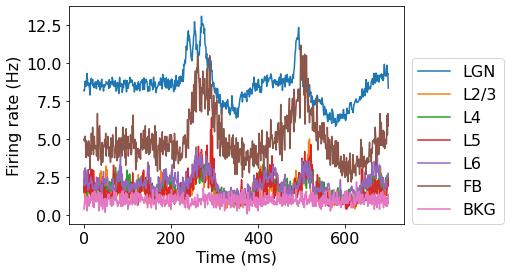

In [53]:
for ipop in range(rmat_model_w_lgn_fb.shape[-1]):
    plt.plot(rmat_model_w_lgn_fb[0,:,ipop], label = population_names_w_lpa_est[ipop])
    
plt.legend(bbox_to_anchor = (1,0.8))
plt.xlabel('Time (ms)')
plt.ylabel('Firing rate (Hz)')

# Load CSD computed from simulated extracellular potentials

In [58]:
selected_sims_data_dir = os.path.join(sim_data_dir, '*full_model*')

csd_sims = find_files(selected_sims_data_dir, filename = 'csd_total.npy')

csd_sims.keys()

nchan_lim = 22
nstim, ntime = 2, 700
csd_for_lpa = np.zeros((nstim, nchan_lim, ntime))

for isim, sim_name in enumerate(csd_sims.keys()):
    print(sim_name, csd_sims[sim_name]['trial_avg'].shape)
    csd_for_lpa[isim] = csd_sims[sim_name]['trial_avg'][:nchan_lim,:]

full_model_white_flash (26, 700)
full_model_black_flash (26, 700)


## Apply LPA

In [60]:
subtract_baseline = True
baseline_presubtracted_lfp = False
if subtract_baseline:
    baseline_end = 200
    baseline_string = 'baseline_subtracted'
else:
    baseline_end = 0
    if baseline_presubtracted_lfp:
        baseline_string = 'baseline_pre_subtracted'
        baseline_end_fir_rates = 250
    else:
        baseline_string = 'w_baseline'
        
#npop_guess = 4

In [61]:
# loading the underlying data matrix and define names
#LOADNAME = 'testdata.mat'
CASENAME = 'apply_LPA_to_sim_CSD_with_layers_of_V1_distinguished'

#DATA = loadmat(LOADNAME)
SETNAME_MUA = 'mua'
SETNAME_LFP = 'lfp'

# MUA = DATA[SETNAME_MUA]
nstim, ntime, nchan = 2, 700, nchan_lim
#LFP = np.zeros((nstim, ntime, nchan))
CSD = np.zeros((nstim, ntime, nchan))
print(CSD.shape)
for istim in range(CSD.shape[0]):
    #LFP[istim] = lfp_for_lpa[istim].T
    CSD[istim] = csd_for_lpa[istim].T
    #CSD[istim] = csd_sum_gt[istim].T
MUA = np.zeros_like(CSD)

###################################################################
# initializing the LPA_signal

nstim, ntime, nchan = CSD.shape

z_start = 0.   # depth of first electrode in mm
z_space = 0.04  # electrode spacing in mm

S_dict = {
    'mua_data' : MUA,
    'lfp_data' : CSD,
    'dt' : 1,
    'z_start' : z_start,
    'z_space' : z_space,
    'casename' : CASENAME,
    'tstim' : baseline_end,
    'sub_at' : 'base', # 
    'verbose' : True
    }

lpa_signal = LPA_Signal(**S_dict)

####################################################################
# Initial guess

#npop_guess = 4

####################################################################
# set up arguments for solving

maxpos = z_start + (nchan - 1) * z_space
maxpopwidth = 0.7
maxslopewidth = z_space

# lower bounds
lb = npop_guess * [z_start]# + 2 * npop_guess * [0]
print('lb = ', lb)
# upper bounds
ub = npop_guess * [maxpos] + npop_guess * [maxpopwidth] # + npop_guess * [maxslopewidth]
print('ub = ', ub)

# put any arguments passed to the initialization of the solver here,
# see documentation for openopt.NLP for details.
init_args = {
     'maxIter' : 10000,
     'maxFunEvals' : 20000,
     'maxTime' : 600,
     'maxCPUTime' : 1000,
     'maxNonSuccess' : 30
    }

# There are also some additional arguments that could be passed to the
# call function of the solver, but most of this will be handled inside
# the call function for lpa_signal (like *x0* and *plot*)
solve_args = {}

# If you subclassed LPA_Signal() and wrote your own error function
# that needs additional arguments, you can put it in the *f_args*
# tuple. Remember that the first argument to the error function is
# always the parameters to be fitted, but this is handled under the
# hood. Only additional (only positional) arguments goes into *f_args*
f_args = ()


###########################################################
''' Set up array of temporal profiles of firing rates for decomposition. Mostly this is already done.
    Just adding strings for paths when saving figures'''
include_lgn = True
if use_model_fir_rates:
    if include_lgn:
        rmat = rmat_model_w_lgn_fb#[:1]
        lgn_string = 'w_lgn_and_fb'
    else:
        rmat = np.zeros((1,) + np.array(list(fir_rate_all_stim_trial_avg.values())).T.shape)
        rmat[0] = np.array(list(fir_rate_all_stim_trial_avg.values())).T
        lgn_string = 'wo_lgn'
    fir_rate_decomp_string = 'decomp_w_mod_fir_rates'
else:
    if include_lgn:
        rmat = rmat_lpa_w_lgn_fb
        lgn_string = 'w_lgn_and_fb'
    else:
        rmat = rmat_lpa
        lgn_string = 'wo_lgn'
    fir_rate_decomp_string = 'decomp_w_lpa_fir_rates'
    
if subtract_baseline:
    for istim in range(rmat.shape[0]):
        rmat[istim] = rmat[istim] - np.mean(rmat[istim,:baseline_end], axis = 0)
        
if rmat.shape[-1] > 3:
    fir_rate_decomp_string = fir_rate_decomp_string + '_w_bkg'
        
        
#for 
kernel = 'uniqueKernelsExp'
#kernel = 'singleExp'

for ipop in range(rmat.shape[-1]):
    if ipop == 0:
        t_kernelParams = [5,5]#,1]
        lb = [4,0]#,1E-3]
        ub = [20,10]#,10]
    else:
        t_kernelParams = np.concatenate([t_kernelParams, [5,5]])#1]])
        lb = np.concatenate([lb, [4,0]])#,1E-3]])
        ub = np.concatenate([ub, [20,10]])#,10]])
    
# these dicts are explained in example1_mua.py
#init_args = {}
solve_args = {}      
    

f_args = (rmat, kernel)
###############################################################
# Solve lfp
print('init_args: ', init_args)
solve_dict = {
    'init_args' : init_args,
    'solve_args' : solve_args,
    'f_args' : f_args,
    'plot' : False,
    }

mode = 'lfp'
solver = 'de' # differential evolution



# Set up dictionaries in case you want to add variably penalty on deviations from 0 in CSD summed across channels
# Here, the penalty factor is simply set to 0

pen_fac_dev_from_0 = 0

err_wo_pen_dict = dict()
Cmat_lpa_dict = dict()
Rmat_lpa_dict = dict()
Cphi_lpa_dict = dict()
h_list_dict = dict()
tau_lpa_dict = dict()
delta_lpa_dict = dict()

#for pen_fac_dev_from_0 in np.arange(0, 10, 0.5):
r_lpa_LFP, Cmat_lpa, Rmat_lpa, Cphi_lpa, h_list, err_wo_pen, tau, delta = lpa_signal(mode, solver, t_kernelParams, lb, ub, pen_fac = pen_fac_dev_from_0, **solve_dict)

err_wo_pen_dict[pen_fac_dev_from_0] = err_wo_pen

Cmat_lpa_dict[pen_fac_dev_from_0] = Cmat_lpa
Rmat_lpa_dict[pen_fac_dev_from_0] = Rmat_lpa
Cphi_lpa_dict[pen_fac_dev_from_0] = Cphi_lpa
h_list_dict[pen_fac_dev_from_0] = h_list
tau_lpa_dict[pen_fac_dev_from_0] = tau
delta_lpa_dict[pen_fac_dev_from_0] = delta

(2, 700, 22)
This is class *LPA_Signal* in *pyLPA* module
lb =  [0.0, 0.0, 0.0, 0.0]
ub =  [0.84, 0.84, 0.84, 0.84, 0.7, 0.7, 0.7, 0.7]
init_args:  {'maxIter': 10000, 'maxFunEvals': 20000, 'maxTime': 600, 'maxCPUTime': 1000, 'maxNonSuccess': 30}
Solving for lfp part of signal
len(ub):  14
self.pen_fac:  0

------------------------- OpenOpt 0.5629 -------------------------
problem: unnamed   type: GLP    goal: minimum
solver: de
variables: 14
  iter  objFunVal  
    0  2.440e-01 
   10  1.680e-01 
   20  1.645e-01 
   30  1.626e-01 
   40  1.616e-01 
   50  1.613e-01 
   60  1.613e-01 
   70  1.613e-01 
   80  1.612e-01 
   90  1.612e-01 
  100  1.612e-01 
  110  1.612e-01 
  120  1.612e-01 
  130  1.612e-01 
  140  1.612e-01 
  142  1.612e-01 
istop: -10 (max objfunc evals limit (p.maxFunEvals=20000) has been reached)
Solver:   Time Elapsed = 38.4  	CPU Time Elapsed = 300
objFuncValue: 0.16124723 (feasible, MaxResidual = 0)


# Analysis of LPA estimates

## Plot LPA-estimated CSD together with original simulated CSD

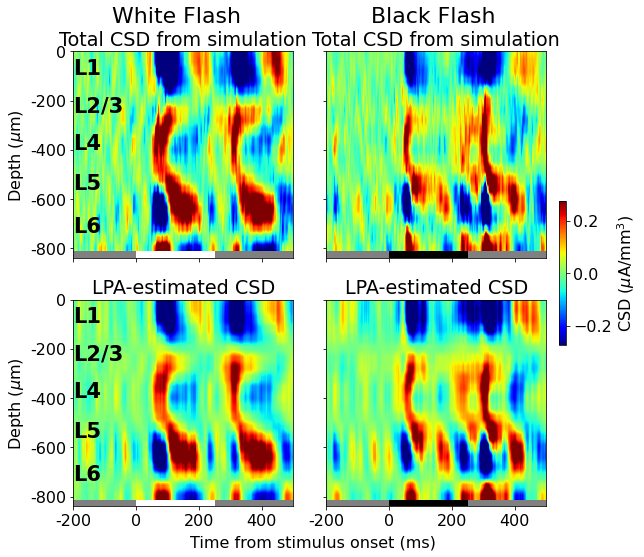

In [64]:
fig, axes = plt.subplots(nrows=2, ncols = 2, figsize = (9, 8), sharex = True, sharey = True)

scale_to_uA = 1E-3
tstim_onset = 200

csd_total_rel_MSE = dict()
csd_total_corr = dict()

pen_fac = 0.0

for istim, sim_name, flash_type in zip(range(2), sim_names, ['white', 'black']):
    ax = axes[0,istim]
    csd_orig_plot = csd_sims[sim_name]['trial_avg'][:nchan_lim]
    csd_orig_plot = (csd_orig_plot.T-np.mean(csd_orig_plot[:,:tstim_onset_sim], axis = 1)).T
    csd_orig_plot = csd_orig_plot*scale_to_uA
    cmap_range = np.abs(csd_orig_plot).max()/3
    ax.imshow(csd_orig_plot, cmap = 'jet', aspect='auto', vmin = -cmap_range, vmax = cmap_range)

    if istim == 0:
        ax.set_ylabel('Depth ($\mu$m)')
    ax.set_yticks(np.arange(0,20+5,5))
    ax.set_yticklabels(-np.arange(0,800+200,200))

    ax.set_title('Total CSD from simulation')
    
    ax.set_ylim([21,0])
        
    if istim == 0:
        ax.hlines(y = 20.7, xmin = 0, xmax = tstim_onset, linewidth = 8.0, colors = 'gray')
        ax.hlines(y = 20.7, xmin = tstim_onset, xmax = tstim_onset+250, linewidth = 8.0, colors = 'white')
        ax.hlines(y = 20.7, xmin = tstim_onset+250, xmax = 700, linewidth = 8.0, colors = 'gray')
    elif istim == 1:
        ax.hlines(y = 20.7, xmin = 0, xmax = tstim_onset, linewidth = 8.0, colors = 'gray')
        ax.hlines(y = 20.7, xmin = tstim_onset, xmax = tstim_onset+250, linewidth = 8.0)
        ax.hlines(y = 20.7, xmin = tstim_onset+250, xmax = 700, linewidth = 8.0, colors = 'gray')


    ax = axes[1,istim]
    csd_lpa_plot = (Cphi_lpa_dict[pen_fac][istim]-np.mean(Cphi_lpa_dict[pen_fac][istim,:tstim_onset_sim], axis = 0)).T
    csd_lpa_plot = csd_lpa_plot*scale_to_uA

    #cmap_range = np.abs(MUA_synth).max()/2
    im = ax.imshow(csd_lpa_plot, cmap = 'jet', aspect='auto', vmin = -cmap_range, vmax = cmap_range)
    
    diff = csd_lpa_plot-csd_orig_plot
    rel_MSE = np.sum(diff**2)/np.sum(csd_orig_plot**2)
    corr = np.corrcoef(csd_orig_plot.flatten(), csd_lpa_plot.flatten())[0,1]
    
    csd_total_rel_MSE[flash_type] = rel_MSE
    csd_total_corr[flash_type] = corr

    ax.set_title('LPA-estimated CSD')
    
    ax.set_ylim([21,0])
    
    if istim == 0:
        ax.hlines(y = 20.7, xmin = 0, xmax = tstim_onset, linewidth = 8.0, colors = 'gray')
        ax.hlines(y = 20.7, xmin = tstim_onset, xmax = tstim_onset+250, linewidth = 8.0, colors = 'white')
        ax.hlines(y = 20.7, xmin = tstim_onset+250, xmax = 700, linewidth = 8.0, colors = 'gray')
    elif istim == 1:
        ax.hlines(y = 20.7, xmin = 0, xmax = tstim_onset, linewidth = 8.0, colors = 'gray')
        ax.hlines(y = 20.7, xmin = tstim_onset, xmax = tstim_onset+250, linewidth = 8.0)
        ax.hlines(y = 20.7, xmin = tstim_onset+250, xmax = 700, linewidth = 8.0, colors = 'gray')
    
    #ax.hlines(y = 21, xmin = tstim_onset, xmax = tstim_onset+250, linewidth = 8.0)
    
    if istim == 0:
        ax.set_ylabel('Depth ($\mu$m)')
    
ax.set_xlim([0,700])
        
ax.set_xticks(np.arange(0,csd_lpa_plot.shape[1],200))
ax.set_xticklabels(np.arange(0,csd_lpa_plot.shape[1],200)-200)

plt.figtext(s = 'Time from stimulus onset (ms)', y = 0.02, x = 0.3)

plt.figtext(s = 'White Flash', y = 0.93, x = 0.18, fontsize = 22)
plt.figtext(s = 'Black Flash', y = 0.93, x = 0.58, fontsize = 22)

cbaxes = fig.add_axes([0.87,0.37,0.01, 0.25])
cb = fig.colorbar(im, ax = ax, cax = cbaxes)
cb.set_label('CSD ($\mu$A/mm$^3$)')

for i in range(2):
    plt.figtext(x = 0.12, y = 0.84-i*0.43, s = 'L1', fontsize = 21, fontweight = 560)
    plt.figtext(x = 0.12, y = 0.775-i*0.43, s = 'L2/3', fontsize = 21, fontweight = 560)
    plt.figtext(x = 0.12, y = 0.71-i*0.43, s = 'L4', fontsize = 21, fontweight = 560)
    plt.figtext(x = 0.12, y = 0.64-i*0.43, s = 'L5', fontsize = 21, fontweight = 560)
    plt.figtext(x = 0.12, y = 0.565-i*0.43, s = 'L6', fontsize = 21, fontweight = 560)

fig.subplots_adjust(wspace = 0.15, left = 0.12, right = 0.85, bottom = 0.09, top = 0.88)

#fig_name = 'csd_total_compare_sim_and_LPA_both_flashes_w_mod_fir_rates.png'

fig_name = 'csd_total_compare_sim_and_LPA_both_flashes_w_lpa_fir_rates.png'
savepath = os.path.join(fig_dir, 'CSD')
    
if not os.path.exists(savepath):
    if not os.path.exists(savepath.rsplit('/', 1)[0]):
        os.mkdir(savepath.rsplit('/', 1)[0])
        os.mkdir(savepath)
    else:
        os.mkdir(savepath)

savepath = os.path.join(savepath, fig_name)
fig.savefig(savepath, facecolor = 'w')

#### Plot metrics in table

In [251]:
import pandas as pd
pd.set_option('precision', 2)
# intialise data of lists.
data = {'':['White flash', 'Black flash'],
        'Relative MSE': [str(np.round(csd_total_rel_MSE['white'],2)), 
                         str(np.round(csd_total_rel_MSE['black'],2))],
        'Correlation': [csd_total_corr['white'], csd_total_corr['black']]}

# Create DataFrame
df = pd.DataFrame(data)

#display(HTML(df.to_html(formatters={'Relative MSE': '{:,.1f}'.format})))

# Print the output.
df

,,Relative MSE,Correlation
0,White flash,0.14,0.94
1,Black flash,0.2,0.91


### Plot temporal profiles of LPA-est. postsynaptic CSD generated from firing in each presynaptic population

In [68]:
flash_types = ['white', 'black']

#### First plot only internal populations in V1

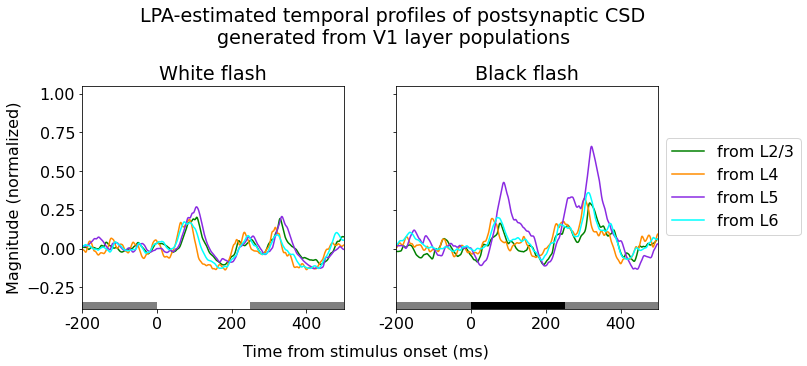

In [69]:
fig, axes = plt.subplots(ncols = 2, nrows =1, figsize = (16, 5), sharey = True)

tstim_onset = 200
#t = np.arange(ntime)
#channel = np.arange(nchan)

pop_colors = ['b', 'g', 'darkorange', 'blueviolet']
#pop_colors_w_lgn = ['lime', 'b', 'g', 'darkorange', 'blueviolet', 'cyan', 'r', 'm'] # with L1
pop_colors_w_lgn = ['lime', 'g', 'darkorange', 'blueviolet', 'cyan', 'r', 'm'] # without L1

if include_lgn:
    colors = pop_colors_w_lgn
else:
    colors = pop_colors
    
if Rmat_lpa.shape[-1] == 6:
    colors = ['lime', 'b', 'g', 'r', 'm', 'pink' ]
    pop_names = np.concatenate([pop_names, pop_names])
    
for istim in range(2):
    ax = axes[istim]
    for i in range(1, Rmat_lpa.shape[-1]-2):
        #if i > 2:
        #    continue
        fir_rate_lpa_plot = Rmat_lpa[istim,:,i]#[:,stim_onset_mark:stim_onset_mark+100,i]#/rmat_lpa[:,stim_onset_mark:stim_onset_mark+100,:].max()
        if ~subtract_baseline:
            fir_rate_lpa_plot -= np.mean(fir_rate_lpa_plot[100:tstim_onset_sim], axis = 0)
        fir_rate_lpa_plot = gaussian_filter1d(fir_rate_lpa_plot,sigma = 2)/\
                                gaussian_filter(Rmat_lpa[:,:,1:6], sigma = (0,2,0)).max()
        ax.plot(fir_rate_lpa_plot, color = colors[i], label='from '+population_names[i])
        if istim == 0:
            ax.set_ylabel('Magnitude (normalized)')
            
        ax.set_title(flash_types[istim].capitalize()+' flash')
        
        ax.set_xticks(np.arange(0,fir_rate_lpa_plot.shape[0],200))
        ax.set_xticklabels(np.arange(0,fir_rate_lpa_plot.shape[0],200)-200)
        
        ax.margins(x=0)
        
        ypos_bar = -0.37
        if istim == 0:
            ax.hlines(y = ypos_bar, xmin = 0, xmax = tstim_onset, linewidth = 8.0, colors = 'gray')
            ax.hlines(y = ypos_bar, xmin = tstim_onset, xmax = tstim_onset+250, linewidth = 8.0, colors = 'white')
            ax.hlines(y = ypos_bar, xmin = tstim_onset+250, xmax = 700, linewidth = 8.0, colors = 'gray')
        elif istim == 1:
            ax.hlines(y = ypos_bar, xmin = 0, xmax = tstim_onset, linewidth = 8.0, colors = 'gray')
            ax.hlines(y = ypos_bar, xmin = tstim_onset, xmax = tstim_onset+250, linewidth = 8.0)
            ax.hlines(y = ypos_bar, xmin = tstim_onset+250, xmax = 700, linewidth = 8.0, colors = 'gray')
        
        #ax.hlines(y = -0.37, xmin = tstim_onset, xmax = tstim_onset+250, linewidth = 8.0)
        
        ax.set_ylim([-0.39, 1.05])

fig.suptitle('LPA-estimated temporal profiles of postsynaptic CSD\ngenerated from V1 layer populations', \
            x = 0.42, y = 0.99)

plt.figtext(s = 'Time from stimulus onset (ms)', x = 0.29, y = 0.02)    

    
ax.legend(bbox_to_anchor = (1,0.8))

#fig.suptitle('Spatiotemporal decomposition of MUA', y = 0.99, x = 0.45)

fig.subplots_adjust(left = 0.15, right = 0.65, bottom = 0.15, top = 0.77)


fig_name = 'LPA-est-both-flashes-postsyn-temporal-profile-lamda-'+str(pen_fac)+'-layers-v1-using-lpa-est-fir-rates.png'

#fig_name = 'LPA-est-both-flashes-postsyn-temporal-profile-lamda-'+str(pen_fac)+'-layers-v1-using-mod-est-fir-rates.png'

#fig_name = 'LPA-est-'+flash_types[istim]+'-flash-postsyn-temporal-profile-lamda-'+str(pen_fac)+'-layers-v1-lpa-est-fir-rates.png'
savepath = os.path.join(fig_dir, 'post_syn_temporal_profiles')

if not os.path.exists(savepath):
    if not os.path.exists(savepath.rsplit('/', 1)[0]):
        os.mkdir(savepath.rsplit('/', 1)[0])
        os.mkdir(savepath)
    else:
        os.mkdir(savepath)

savepath = os.path.join(savepath, fig_name)
#fig.savefig(savepath, facecolor = 'w')

#### Now plot only external populations

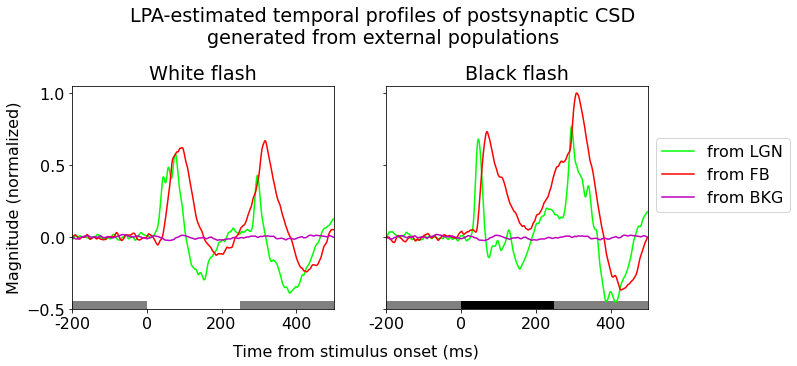

In [70]:
fig, axes = plt.subplots(ncols = 2, nrows =1, figsize = (16, 5), sharey = True)

fig.subplots_adjust(left = 0.15, right = 0.65, bottom = 0.15, top = 0.85)

#t = np.arange(ntime)
#channel = np.arange(nchan)
    
if Rmat_lpa.shape[-1] == 6:
    colors = ['lime', 'b', 'g', 'r', 'm', 'pink' ]
    pop_names = np.concatenate([pop_names, pop_names])
    
for istim in range(2):
    ax = axes[istim]
    for i in [0,5,6]:
        #if i > 2:
        #    continue
        #if ~subtract_baseline:
        #    fir_rate_lpa_plot -= np.mean(fir_rate_lpa_plot[100:tstim_onset_sim], axis = 0)
        fir_rate_lpa_plot = Rmat_lpa[istim,:,i]#[:,stim_onset_mark:stim_onset_mark+100,i]#/rmat_lpa[:,stim_onset_mark:stim_onset_mark+100,:].max()
        fir_rate_lpa_plot = gaussian_filter1d(fir_rate_lpa_plot,sigma = 2)/gaussian_filter(Rmat_lpa, sigma = (0,2,0)).max()
        ax.plot(fir_rate_lpa_plot, color = colors[i], label='from '+population_names[i])
        if istim == 0:
            ax.set_ylabel('Magnitude (normalized)')

        ax.set_title(flash_types[istim].capitalize()+' flash')
        
        ax.set_xticks(np.arange(0,fir_rate_lpa_plot.shape[0],200))
        ax.set_xticklabels(np.arange(0,fir_rate_lpa_plot.shape[0],200)-200)
        
        ax.margins(x=0)
        
        ypos_bar = -0.47
        if istim == 0:
            ax.hlines(y = ypos_bar, xmin = 0, xmax = tstim_onset, linewidth = 8.0, colors = 'gray')
            ax.hlines(y = ypos_bar, xmin = tstim_onset, xmax = tstim_onset+250, linewidth = 8.0, colors = 'white')
            ax.hlines(y = ypos_bar, xmin = tstim_onset+250, xmax = 700, linewidth = 8.0, colors = 'gray')
        elif istim == 1:
            ax.hlines(y = ypos_bar, xmin = 0, xmax = tstim_onset, linewidth = 8.0, colors = 'gray')
            ax.hlines(y = ypos_bar, xmin = tstim_onset, xmax = tstim_onset+250, linewidth = 8.0)
            ax.hlines(y = ypos_bar, xmin = tstim_onset+250, xmax = 700, linewidth = 8.0, colors = 'gray')
        
        #ax.hlines(y = -0.47, xmin = tstim_onset, xmax = tstim_onset+250, linewidth = 8.0)
        
        ax.set_ylim([-0.5, 1.05])

    
fig.suptitle('LPA-estimated temporal profiles of postsynaptic CSD\ngenerated from external populations', \
            x = 0.42, y = 0.99)

plt.figtext(s = 'Time from stimulus onset (ms)', x = 0.29, y = 0.02)    

    
ax.legend(bbox_to_anchor = (1,0.8))

fig.subplots_adjust(left = 0.15, right = 0.65, bottom = 0.15, top = 0.77)


fig_name = 'LPA-est-both-flashes-postsyn-temporal-profile-lamda-'+str(pen_fac)+'-ext-structs-using-lpa-est-fir-rates.png'

#fig_name = 'LPA-est-both-flashes-postsyn-temporal-profile-lamda-'+str(pen_fac)+'-ext-structs-using-mod-est-fir-rates.png'

#fig_name = 'LPA-est-'+flash_types[istim]+'-flash-postsyn-temporal-profile-lamda-'+str(pen_fac)+'-ext-structs-lpa-est-fir-rates.png'
savepath = os.path.join(fig_dir, 'post_syn_temporal_profiles')

if not os.path.exists(savepath):
    os.mkdir(savepath)

savepath = os.path.join(savepath, fig_name)
#fig.savefig(savepath, facecolor = 'w')

### Plot CSD population spatial profiles from LPA estimate

L2/3 -0.6924556276411017 13
L4 0.0412589096858586 5
L5 1.8169357058009648 7
L6 -0.2150007122433274 5
LGN -1.0288404776931992 12
FB -0.45628998394439396 5
BKG -1.676646205756004 5


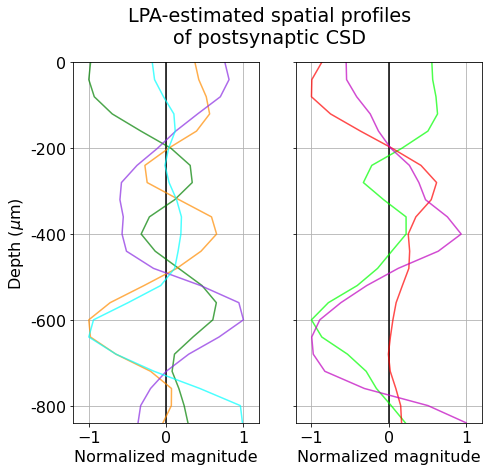

In [71]:
fig, axes = plt.subplots(figsize = (7,6.5), ncols = 2, sharey = True)

'''if include_lgn:
    colors = pop_colors_w_lgn
else:
    colors = pop_colors'''
    
Cmat_lpa = Cmat_lpa_dict[pen_fac]
    
channels = np.arange(Cmat_lpa.shape[0])

ax = axes[0]

for ipop in range(1, Cmat_lpa.shape[-1]-2):
    spat_prof_lpa_pop = Cmat_lpa[:,ipop]
    spat_prof_lpa_pop_plot = spat_prof_lpa_pop/np.abs(spat_prof_lpa_pop).max()
    
    print(population_names[ipop], spat_prof_lpa_pop_plot.sum(), abs(np.argmin(spat_prof_lpa_pop_plot)-np.argmax(spat_prof_lpa_pop_plot)))
    
    ax.plot(spat_prof_lpa_pop_plot, channels, color = colors[ipop], alpha = 0.7, label = 'from '+population_names[ipop])#, color = colors[ipop % (npop_guess+2)])
    
ax.set_ylabel('Depth ($\mu$m)')
ax.set_yticks(np.arange(0,25+5,5))
ax.set_yticklabels(-np.arange(0,1000+200,200))

ax.vlines(x = 0, ymin = 0, ymax = len(channels))
ax.set_ylim([0,25])
ax.set_xlabel('Normalized magnitude')

ax.set_xlim([-1.2, 1.2])
ax.invert_yaxis()
ax.grid()
    
ax = axes[1]
for ipop in [0, 5, 6]:
    spat_prof_lpa_pop = Cmat_lpa[:,ipop]
    spat_prof_lpa_pop_plot = spat_prof_lpa_pop/np.abs(spat_prof_lpa_pop).max()
    
    print(population_names[ipop], spat_prof_lpa_pop_plot.sum(), abs(np.argmin(spat_prof_lpa_pop_plot)-np.argmax(spat_prof_lpa_pop_plot)))
    
    ax.plot(spat_prof_lpa_pop_plot, channels, color = colors[ipop], alpha = 0.7, label = 'from '+population_names[ipop])#, color = colors[ipop % (npop_guess+2)])

ax.vlines(x = 0, ymin = 0, ymax = len(channels))
ax.set_ylim([0,nchan_lim-1])
ax.set_xlabel('Normalized magnitude')
    
ax.set_xlim([-1.2, 1.2])
ax.invert_yaxis()
ax.grid()
#fig.legend(bbox_to_anchor = (1.00,0.75))

fig.suptitle('LPA-estimated spatial profiles\nof postsynaptic CSD', y = 1.0, x = 0.55)

#fig.subplots_adjust(left = 0.17, right = 0.68, bottom = 0.1, top = 0.9)

fig.subplots_adjust(left = 0.16, right = 0.97, bottom = 0.11, top = 0.88)

#fig_name = 'spatial_profile_LPA-est_CSD_pops.png'
#fig_name = 'spatial_profile_LPA-est_CSD_pops-lpa-est-fir-rates-w-mod-fir-rates.png'

fig_name = 'spatial_profile_LPA-est_CSD_pops-lpa-est-fir-rates-w-LPA-est-fir-rates.png'

savepath = os.path.join(fig_dir, 'post_syn_spatial_profiles')
    
if not os.path.exists(savepath):
    os.mkdir(savepath)

savepath = os.path.join(savepath, fig_name)

#fig.savefig(savepath, facecolor = 'w')

In [257]:
csd_lpa_pop_recon.shape

(2, 7, 22, 700)

# Load ground truth data

In [74]:
config_name = '2022_jan_07_config'

In [75]:
csd_gt_flashes = dict()

for istim in range(2):
    flash_type = flash_types[istim]
    if istim == 0:
        dir_add = ''
        filename_add = ''
    elif istim == 1:
        dir_add = 'black_flash'
        filename_add = '_black'
        

    # LGN
    filename = 'csd_total_lgn.npy'
    loadpath = os.path.join('..', 'ground_truth', 'replay_w_cut_sims', config_name, dir_add, filename)
    csd_sims_gt = np.load(loadpath, allow_pickle=True)[()]
    
    # V1    
    filename = 'csd_total.npy'
    loadpath = os.path.join('..', 'ground_truth', 'replay_w_cut_sims', config_name, dir_add,filename)

    csd_sims_gt_temp = np.load(loadpath, allow_pickle=True)[()]

    for sim_name in csd_sims_gt_temp.keys():
        if 'L1' in sim_name:
            continue
        csd_sims_gt[sim_name] = csd_sims_gt_temp[sim_name]

    # FB
    filename = 'csd_total_fb.npy'
    loadpath = os.path.join('..', 'ground_truth', 'replay_w_cut_sims', config_name, dir_add, filename)
    csd_sims_gt_temp = np.load(loadpath, allow_pickle=True)[()]

    for sim_name in csd_sims_gt_temp.keys():
        csd_sims_gt[sim_name] = csd_sims_gt_temp[sim_name]

    # BKG
    filename = 'csd_total_bkg.npy'
    loadpath = os.path.join('..', 'ground_truth', 'replay_w_cut_sims', config_name, dir_add, filename)
    csd_sims_gt_temp = np.load(loadpath, allow_pickle=True)[()]

    for sim_name in csd_sims_gt_temp.keys():
        csd_sims_gt[sim_name] = csd_sims_gt_temp[sim_name]
        
    csd_gt_flashes[flash_type] = csd_sims_gt

In [76]:
csd_sims_gt.keys()

dict_keys(['all_active_no_recurr_only_LGN_black', '2022_jan_07_replay_recurr_L23_w_cut_black', '2022_jan_07_replay_recurr_L4_w_cut_black', '2022_jan_07_replay_recurr_L5_w_cut_black', '2022_jan_07_replay_recurr_L6_w_cut_black', '2022_jan_07_fb_only_no_bkg_black', '2022_jan_07_bkg_only'])

### Plot ground truth CSD contributions from each population

In [77]:
pop_names_gt = ['LGN', 'L2/3', 'L4', 'L5', 'L6', 'FB', 'BKG']

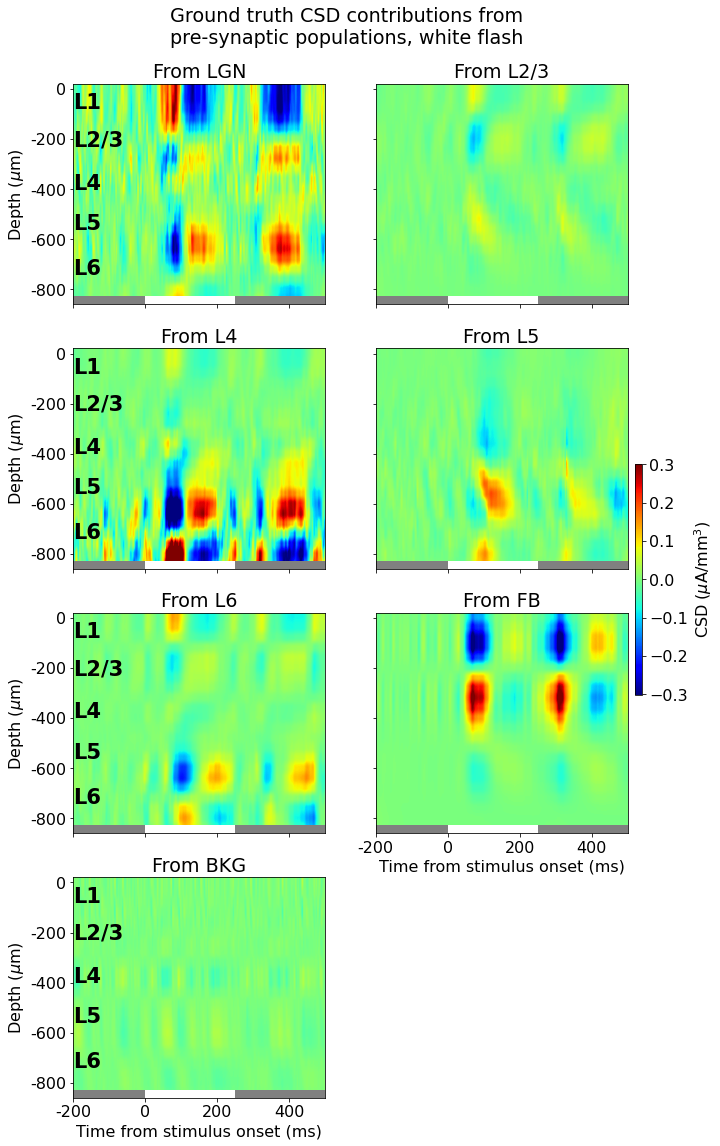

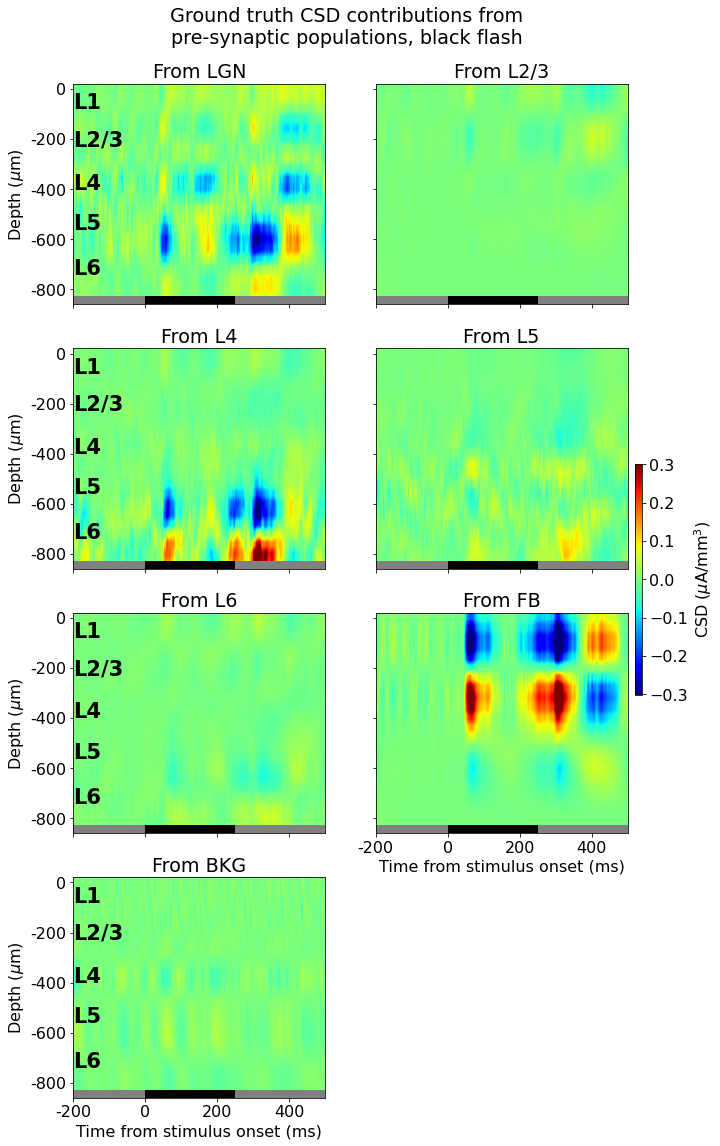

In [78]:
csd_gt_flashes_for_quant = dict()

for flash_type in csd_gt_flashes.keys():
    
    csd_sims_gt = csd_gt_flashes[flash_type]

    fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (10,16), sharex = False, sharey = True)

    csd_gt_all = []

    for isim, sim_name in enumerate(csd_sims_gt.keys()):
        
        irow = isim // 2
        icol = isim % 2
        ax = axes[irow,icol]

        csd_gt = csd_sims_gt[sim_name]['trial_avg'][:nchan_lim]*1E-3

        csd_gt_all.append(csd_gt)

        if flash_type == 'white':
            if isim == 0:
                cmap_range_gt = np.abs(csd_gt).max()/1.2

        im = ax.imshow(csd_gt, cmap = 'jet', vmin = -cmap_range_gt, vmax = cmap_range_gt, aspect = 'auto')

        ax.set_title('From '+pop_names_gt[isim])


        if icol == 0:
            ax.set_yticks(np.arange(0,25,5))
            ax.set_yticklabels(-np.arange(0,1000,200))
            ax.set_ylabel('Depth ($\mu$m)')

        if irow == 3 or (irow == 2 and icol == 1):
            ax.set_xticks(np.arange(0,csd_lpa_pop_plot.shape[1],200))
            ax.set_xticklabels(np.arange(0,csd_lpa_pop_plot.shape[1],200)-200)
            ax.set_xlabel('Time from stimulus onset (ms)')

            #ax.hlines(y = 21.1, xmin = tstim_onset, xmax = tstim_onset+250, linewidth = 8.0)
        else:
            ax.set_xticks(np.arange(0,csd_lpa_pop_plot.shape[1],200))
            ax.set_xticklabels([])

        if icol == 0:
            ax.text(x = 0.12, y = 2, s = 'L1', fontsize = 21, fontweight = 560)
            ax.text(x = 0.12, y = 5.7, s = 'L2/3', fontsize = 21, fontweight = 560)
            ax.text(x = 0.12, y = 10, s = 'L4', fontsize = 21, fontweight = 560)
            ax.text(x = 0.12, y = 14, s = 'L5', fontsize = 21, fontweight = 560)
            ax.text(x = 0.12, y = 18.5, s = 'L6', fontsize = 21, fontweight = 560)
            
        ax.set_xlim([0,700])
            
        if flash_type == 'white':
            ax.hlines(y = 21.1, xmin = 0, xmax = tstim_onset, linewidth = 8.0, colors = 'gray')
            ax.hlines(y = 21.1, xmin = tstim_onset, xmax = tstim_onset+250, linewidth = 8.0, colors = 'white')
            ax.hlines(y = 21.1, xmin = tstim_onset+250, xmax = 700, linewidth = 8.0, colors = 'gray')
        elif flash_type == 'black':
            ax.hlines(y = 21.1, xmin = 0, xmax = tstim_onset, linewidth = 8.0, colors = 'gray')
            ax.hlines(y = 21.1, xmin = tstim_onset, xmax = tstim_onset+250, linewidth = 8.0)
            ax.hlines(y = 21.1, xmin = tstim_onset+250, xmax = 700, linewidth = 8.0, colors = 'gray')
            
    fig.delaxes(axes[-1,-1])
            
    csd_gt_flashes_for_quant[flash_type] = np.array(csd_gt_all)

    cbaxes = fig.add_axes([0.88,0.40,0.01, 0.2])
    cb = fig.colorbar(im, ax = ax, cax = cbaxes)
    cb.set_label('CSD ($\mu$A/mm$^3$)')

    fig.subplots_adjust(left = 0.1, right = 0.87, bottom = 0.05, top = 0.93)

    fig.suptitle('Ground truth CSD contributions from\npre-synaptic populations, '+flash_type+' flash', x = 0.48, y = 0.997)

    fig_name = 'csd_ground_truth_pop_contribs_'+flash_type+'.png'

    savepath = os.path.join(fig_dir, 'pop-est')
    
    if not os.path.exists(savepath):
        if not os.path.exists(savepath.rsplit('/', 1)[0]):
            os.mkdir(savepath.rsplit('/', 1)[0])
            os.mkdir(savepath)
        else:
            os.mkdir(savepath)

    savepath = os.path.join(savepath, fig_name)

    #fig.savefig(savepath, facecolor = 'w')

### Get LPA-estimated CSD generated from each presynaptic population

In [79]:
csd_lpa_pen_dict = dict()

for pen_fac in list(Rmat_lpa_dict.keys()):
    Rmat_lpa = Rmat_lpa_dict[pen_fac]
    Cmat_lpa = Cmat_lpa_dict[pen_fac]

    csd_lpa_pop_recon = np.zeros((Rmat_lpa.shape[0], Rmat_lpa.shape[2], Cmat_lpa.shape[0], Rmat_lpa.shape[1]))
    
    csd_lpa_pops_dict = dict()
    
    for ipop in range(Cmat_lpa.shape[-1]):
        for istim in range(Rmat_lpa.shape[0]):

            csd_lpa_pop_recon[istim, ipop] = np.outer(Cmat_lpa[:,ipop], Rmat_lpa[istim,:,ipop])

        pop_name = population_names[ipop]

        csd_lpa_pops_dict[pop_name] = csd_lpa_pop_recon[:,ipop]

    csd_lpa_pen_dict[pen_fac] = csd_lpa_pops_dict


### Plot LPA-estimated population CSD

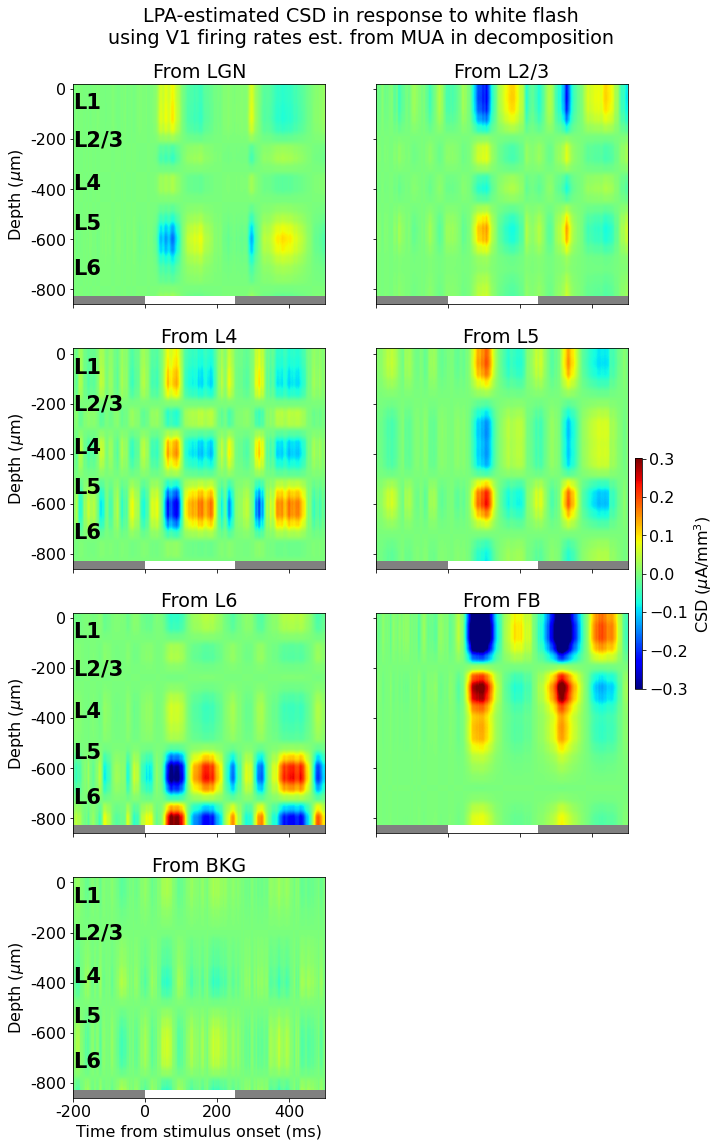

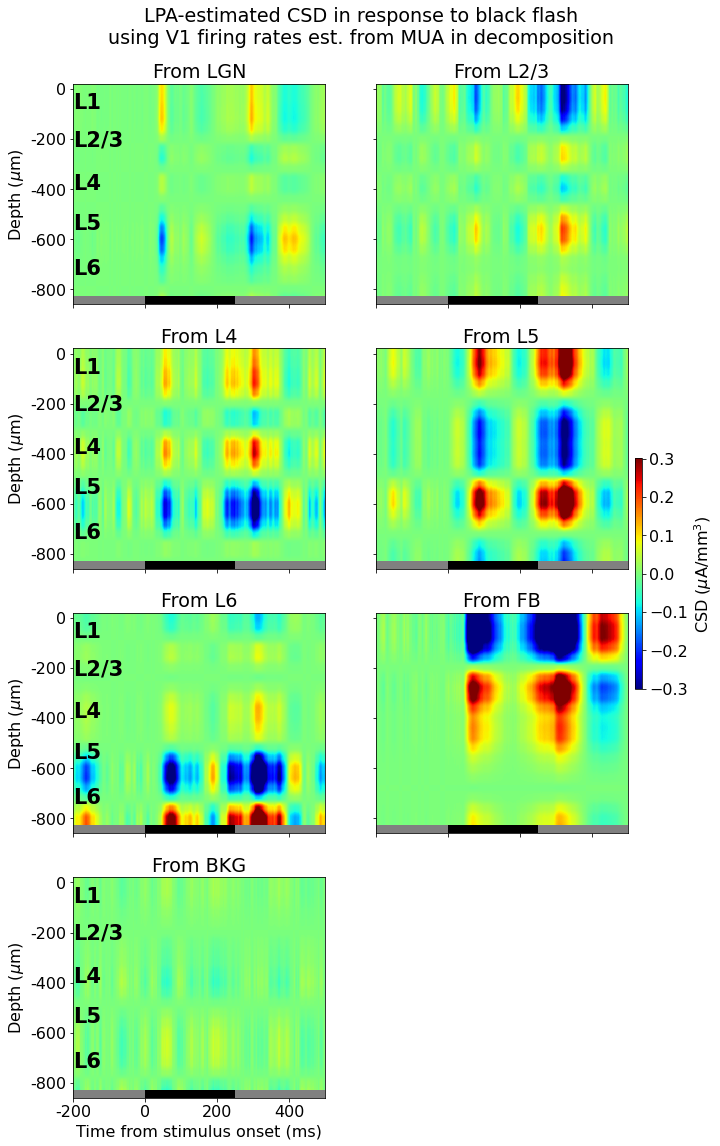

In [80]:
tstim_onset = 200

pen_fac = 0.0

#for pen_fac in csd_lpa_pen_dict.keys():
csd_lpa_pops_dict = csd_lpa_pen_dict[pen_fac]
for istim in range(2):
    fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (10,16), sharex = False, sharey = True)

    ipop = 0 
    for pop_name in csd_lpa_pops_dict.keys():
        if pop_name == 'L1':
            continue
        irow = ipop // 2
        icol = ipop % 2

        csd_lpa_pop_plot = csd_lpa_pops_dict[pop_name][istim]*1E-3

        #if ipop == 0:
        #    cmap_range = np.abs(csd_lpa_pop_plot).max()

        ax = axes[irow,icol]

        im = ax.imshow(csd_lpa_pop_plot[:,:], aspect = 'auto', cmap = 'jet', vmin = -cmap_range_gt, vmax = cmap_range_gt)

        ax.set_title('From '+pop_name)

        if icol == 0:
            ax.set_yticks(np.arange(0,25,5))
            ax.set_yticklabels(-np.arange(0,1000,200))
            ax.set_ylabel('Depth ($\mu$m)')
            
            ax.text(x = 0.12, y = 2, s = 'L1', fontsize = 21, fontweight = 560)
            ax.text(x = 0.12, y = 5.7, s = 'L2/3', fontsize = 21, fontweight = 560)
            ax.text(x = 0.12, y = 10, s = 'L4', fontsize = 21, fontweight = 560)
            ax.text(x = 0.12, y = 14, s = 'L5', fontsize = 21, fontweight = 560)
            ax.text(x = 0.12, y = 18.5, s = 'L6', fontsize = 21, fontweight = 560)

        if irow == 3:
            ax.set_xticks(np.arange(0,csd_lpa_pop_plot.shape[1],200))
            ax.set_xticklabels(np.arange(0,csd_lpa_pop_plot.shape[1],200)-200)
            ax.set_xlabel('Time from stimulus onset (ms)')

            ax.hlines(y = 21.1, xmin = tstim_onset, xmax = tstim_onset+250, linewidth = 8.0)
        else:
            ax.set_xticks(np.arange(0,csd_lpa_pop_plot.shape[1],200))
            ax.set_xticklabels([])
            
        if istim == 0:
            ax.hlines(y = 21.1, xmin = 0, xmax = tstim_onset, linewidth = 8.0, colors = 'gray')
            ax.hlines(y = 21.1, xmin = tstim_onset, xmax = tstim_onset+250, linewidth = 8.0, colors = 'white')
            ax.hlines(y = 21.1, xmin = tstim_onset+250, xmax = 700, linewidth = 8.0, colors = 'gray')
        elif istim == 1:
            ax.hlines(y = 21.1, xmin = 0, xmax = tstim_onset, linewidth = 8.0, colors = 'gray')
            ax.hlines(y = 21.1, xmin = tstim_onset, xmax = tstim_onset+250, linewidth = 8.0)
            ax.hlines(y = 21.1, xmin = tstim_onset+250, xmax = 700, linewidth = 8.0, colors = 'gray')
            
        ipop += 1
        
        ax.set_xlim([0,700])
        
    fig.delaxes(axes[-1,-1])

    cbaxes = fig.add_axes([0.88,0.405,0.01, 0.2])
    cb = fig.colorbar(im, ax = ax, cax = cbaxes)
    cb.set_label('CSD ($\mu$A/mm$^3$)')

    #plt.figtext(s = 'Time from stimulus onset (ms)', x = 0.43, y = 0.07)

    #fig.delaxes(axes[-1,-1])

    fig.subplots_adjust(left = 0.1, right = 0.87, bottom = 0.05, top = 0.93)

    fig.suptitle('LPA-estimated CSD in response to '+flash_types[istim]+' flash\nusing V1 firing rates est. from MUA in decomposition', y = 0.997)

    #fig.suptitle('LPA-estimated CSD in response to '+flash_types[istim]+' flash\nusing model firing rates in decomposition', y = 0.997)

    fig_name = 'lpa-est-pop-contrib-pen-fac-'+str(np.round(pen_fac,4))+'-w-lpa-est-firing-rates-'+flash_types[istim]+'-same-scale-as-gt.png'

    #fig_name = 'lpa-est-pop-contrib-pen-fac-'+str(np.round(pen_fac,4))+'-w-mod-firing-rates-'+flash_types[istim]+'-same-scale-as-gt.png'

    #fig_name = 'lpa-est-pop-contrib-pen-fac-'+str(np.round(pen_fac,4))+'-w-mod.png'

    savepath = os.path.join(fig_dir, 'pop-est')

    if not os.path.exists(savepath):
        if not os.path.exists(savepath.rsplit('/', 1)[0]):
            os.mkdir(savepath.rsplit('/', 1)[0])
            os.mkdir(savepath)
        else:
            os.mkdir(savepath)

    savepath = os.path.join(savepath, fig_name)

    #fig.savefig(savepath, facecolor = 'w')

### Calculate metrics for similarity between LPA-estimated and ground truth CSD

In [90]:
csd_lpa_pops_arr = np.array(list(csd_lpa_pops_dict.values()))*1E-3

In [91]:
population_names = ['LGN', 'L2/3', 'L4', 'L5', 'L6', 'FB', 'BKG']

In [92]:
do_plot = False

rel_MSE_pops_flashes = dict()
corr_pops_flashes = dict()

for istim, flash_type in enumerate(csd_gt_flashes_for_quant.keys()):
    
    csd_gt_all = csd_gt_flashes_for_quant[flash_type]

    if do_plot:
        fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (10,16))

    rel_MSE_pops = dict()
    corr_pops = dict()

    for ipop in range(csd_gt_all.shape[0]):
        irow = ipop // 2
        icol = ipop % 2

        diff_csd = (csd_lpa_pops_arr[ipop, istim] - csd_gt_all[ipop])

        rel_MSE = (diff_csd**2).sum()/(csd_gt_all[ipop]**2).sum()

        corr = np.corrcoef(csd_gt_all[ipop].flatten(), csd_lpa_pops_arr[ipop, istim].flatten())[0,1]

        rel_MSE_pops[population_names[ipop]] = rel_MSE

        corr_pops[population_names[ipop]] = corr

        if do_plot:
            ax = axes[irow,icol]
            im = ax.imshow(diff_csd, cmap = 'jet', vmin = -cmap_range, vmax = cmap_range, aspect = 'auto')
        
    rel_MSE_pops_flashes[flash_type] = rel_MSE_pops
    corr_pops_flashes[flash_type] = corr_pops

#### Plot metrics

In [87]:
for flash_type in rel_MSE_pops_flashes.keys():
    rel_MSE_pops = rel_MSE_pops_flashes[flash_type]

    import pandas as pd
    pd.set_option('precision', 2)
    # intialise data of lists.
    data = {'': ['LGN', 'L2/3', 'L4', 'L5', 'L6', 'FB', 'BKG'],
            "Relative MSE": [str(np.round(rel_MSE_pops['LGN'],1)), 
                            str(np.round(rel_MSE_pops['L2/3'],1)),
                            str(np.round(rel_MSE_pops['L4'],1)),
                            str(np.round(rel_MSE_pops['L5'],1)),
                            str(np.round(rel_MSE_pops['L6'],1)),
                            str(np.round(rel_MSE_pops['FB'],1)),
                            str(np.round(rel_MSE_pops['BKG'],1))],
            'Correlation': [corr_pops['LGN'], corr_pops['L2/3'], corr_pops['L4'],
                           corr_pops['L5'], corr_pops['L6'], corr_pops['FB'], corr_pops['BKG']]}

    # Create DataFrame
    df = pd.DataFrame(data)

    caption = 'Title'

    styles = [dict(selector="caption", 
        props=[("text-align", "center"),
        ("font-size", "120%"),
        ("color", 'black')])] 

    #df.style.set_table_attributes("style='display:inline; font-size:110%' ").set_caption(caption).set_table_styles(styles)._repr_html_()

    #df.style.set_caption("White flash")

    df.style.background_gradient()

    #display(HTML(df.to_html(formatters={'Relative MSE': '{:,.1f}'.format})))

    df = df.style.hide_index()

    # Print the output.
    display(df)

,Relative MSE,Correlation
LGN,0.6,0.59
L2/3,4.0,0.01
L4,0.8,0.44
L5,2.4,-0.07
L6,2.7,0.58
FB,0.7,0.84
BKG,1.4,0.54


,Relative MSE,Correlation
LGN,0.7,0.59
L2/3,18.6,0.01
L4,1.2,0.44
L5,18.9,-0.07
L6,37.9,0.58
FB,0.9,0.84
BKG,1.4,0.54
